# Using Pillow (PIL)

In [1]:
from PIL import Image  # Needed to use Image without qualifier; alternative is `import PIL.Image`

In [2]:
# Load image from a JPEG file
img = Image.open("example_bowl_of_onions.jpg")

In [3]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [4]:
img.size

(854, 834)

In [5]:
img.mode

'RGB'

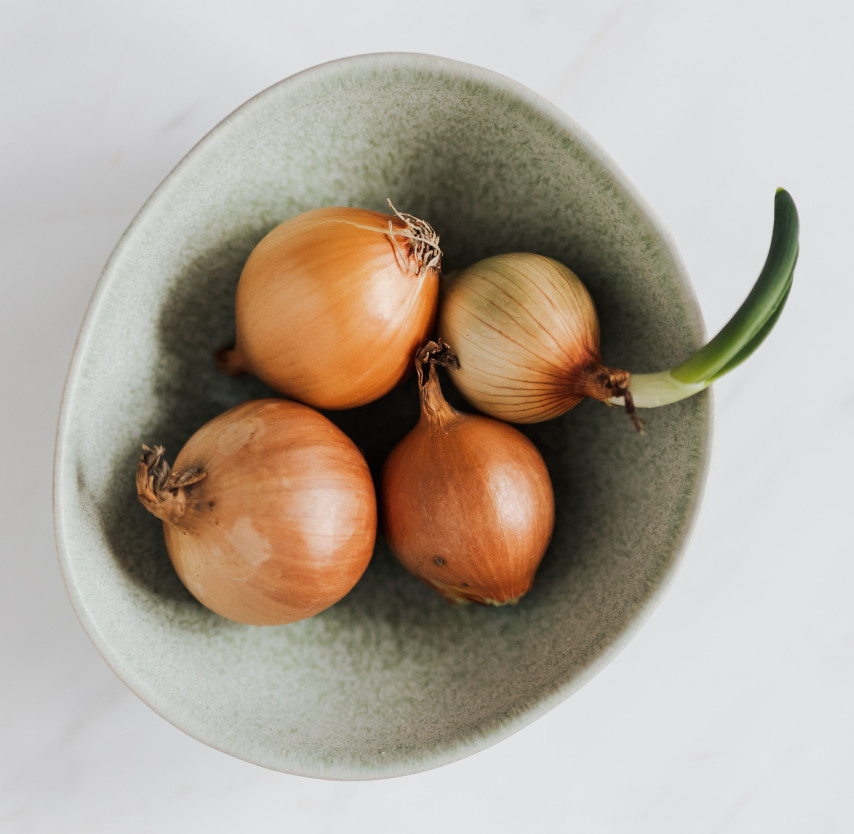

In [6]:
# PIL images display natively in notebooks
img

Let's get the color of one of those onions.

In [8]:
img.getpixel( (320,280) )  # 320 = a little less than half way across; 280 = about a third of the way down
# Return value is ( Red_byte, Green_byte, Blue_byte )

(212, 138, 67)

In [9]:
# Color swatch to see that color
Image.new("RGB", (30,30), color=(212, 138, 67) )

In [10]:
# Put a single black pixel near the upper left
img.putpixel( (30,80), (0,0,0) )

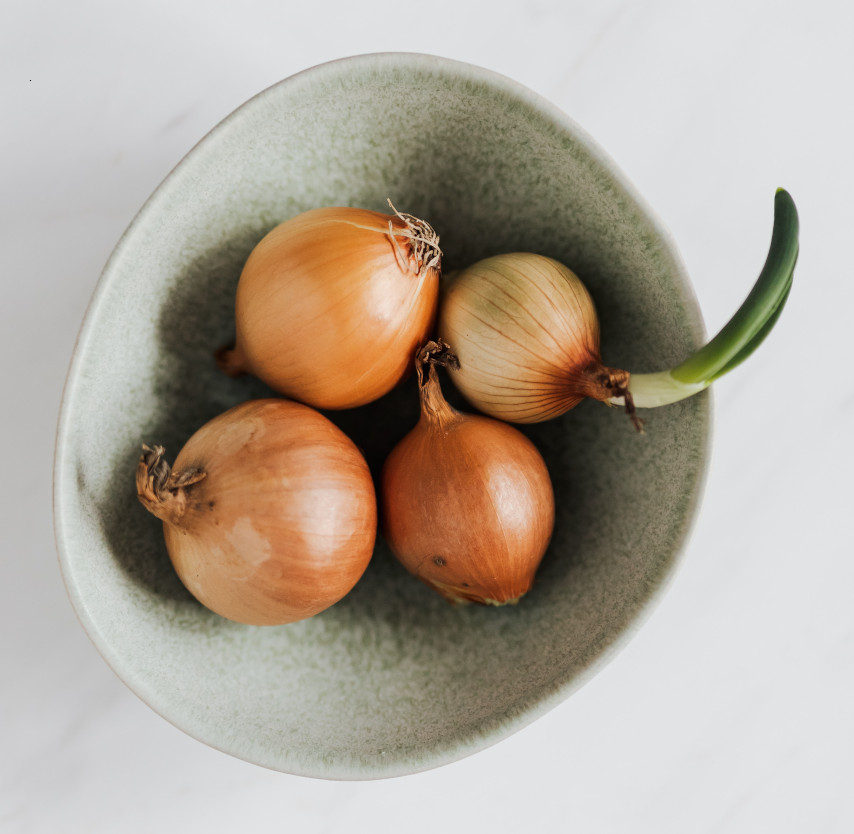

In [11]:
img  # it's a little hard to see, but there's a new black dot.

Let's write a function that takes an image object and draws a white plus sign at a specified location.

In [12]:
def plusmark(im,location):
    "Put a white plus sign at location `location` in the image `im`"
    cx = location[0]
    cy = location[1]
    # horizontal line
    for i in range(-10,11):
        im.putpixel( (cx+i,cy), (255,255,255) )
    # vertical line
    for j in range(-10,11):
        im.putpixel( (cx,cy+j), (255,255,255) )

In [13]:
plusmark(img,(320,280))

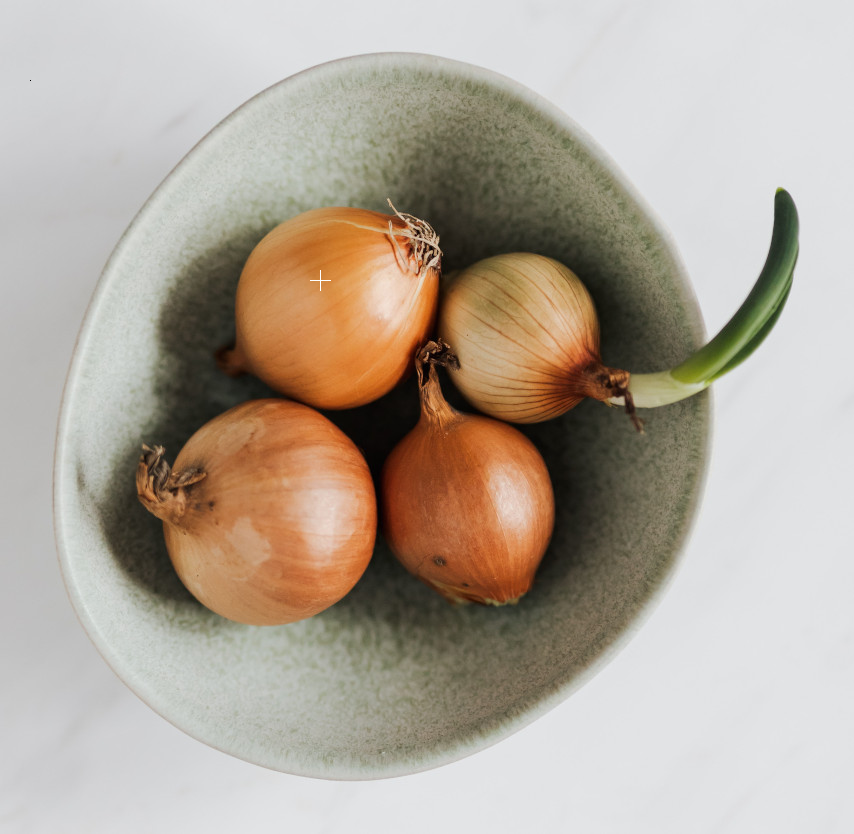

In [14]:
img  # Note the white plus showing where we sampled the color above.

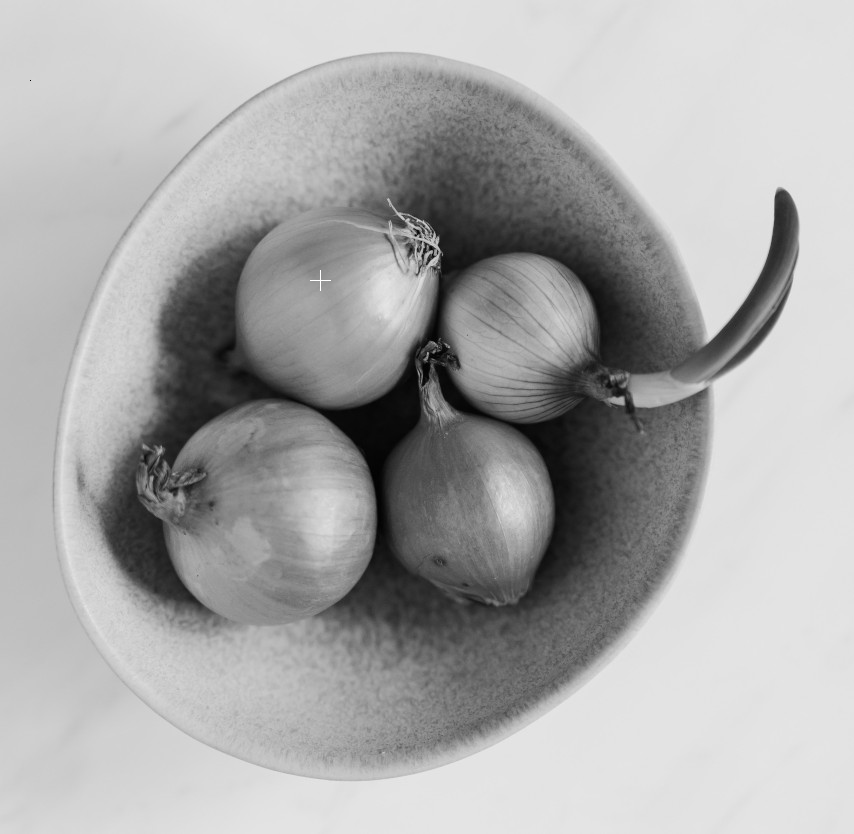

In [15]:
# Conversion to a different mode, in this case grayscale
img.convert("L")

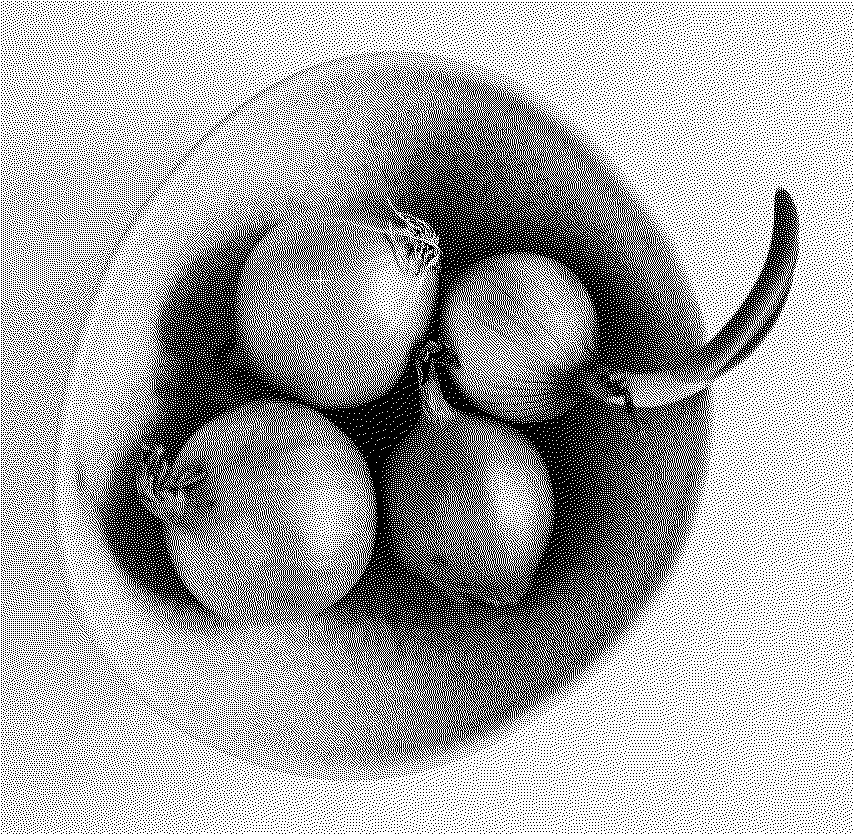

In [16]:
# Black and white (1 bit per pixel).  Will use dithering to try to look more like grayscale.
img.convert("1")

## Create an image from scratch

In [17]:
# 300x300 pixel color image, filled with black
img = Image.new("RGB",(300,300),color=(0,0,0))

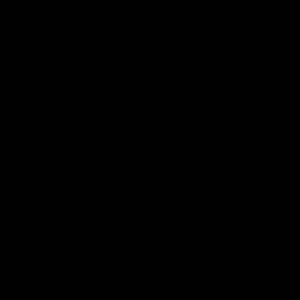

In [18]:
img

### Example 1: Sierpinski gasket

* Draw a cyan pixel at some location.
* Choose a corner of the image other than the lower right, at random, and move half way toward it.
* Repeat.

After thousands of iterations, the pixels form a nice pattern.

In [27]:
img = Image.new("RGB",(300,300),color=(0,0,0))

In [28]:
curx = 150
cury = 150

In [29]:
corners = [ (0,0), (299,0), (0,299) ]

In [30]:
import random

In [31]:
for _ in range(50_000):
    img.putpixel( (int(curx),int(cury)), (0,255,255))
    chosen_corner = random.choice(corners)
    curx = 0.5*(curx + chosen_corner[0])
    cury = 0.5*(cury + chosen_corner[1])

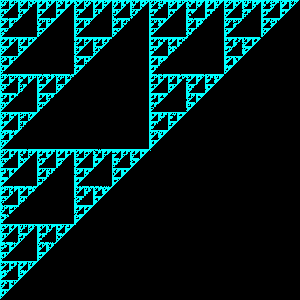

In [32]:
img

In [33]:
img.save("sierpinski.png")  # Yes good

In [34]:
img.save("sierpinski.jpeg",quality=10)  # No NO BAD BAD BAD; sharp contrast = poor JPEG

### Example 2: Random walk

* Draw a magenta pixel at some location.
* Change the location by 1 pixel in the vertical or horizontal direction (at random)
* Repeat.

After thousands of iterations, the pixels show an interesting path of WanderBot movement.

In [37]:
img = Image.new("RGB",(300,300),color=(0,0,0))

In [41]:
curx = 150
cury = 150
displacements = [ (1,0), (-1,0), (0,1), (0,-1) ]
for _ in range(50_000):
    try:
        img.putpixel( (int(curx),int(cury)), (255,0,255))
    except IndexError:
        pass
    delta = random.choice(displacements)
    curx += delta[0]
    cury += delta[1]

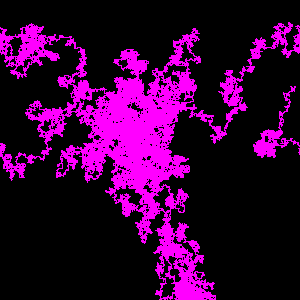

In [42]:
img

In [43]:
img.save("randomwalk.png") # Yes, good for pixel art and other high-contrast images

In [44]:
img.save("randomwalk.jpeg",quality=10) # NO BAD BAD BAD, the high contrast will mean compression artifacts